In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Code to load dask df and create sample for pandas df

In [4]:
import dask.dataframe as dd
from dask import compute

In [9]:
from time import time

In [5]:
ddf = dd.read_csv('/Users/gauravbishnoi/datas/nyc_taxi_fare/train.csv')

In [6]:
ddf.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [7]:
ddf.shape[0].compute()

55423856

In [8]:
len(ddf.columns)

8

In [35]:
100000/55423856

0.0018042772051082118

In [36]:
df = ddf.sample(frac=0.002).compute()

In [37]:
df.shape

(110832, 8)

In [43]:
df.to_csv('train_sample.csv', index=False)

-----

In [3]:
df = pd.read_csv('train_sample.csv')

In [4]:
df.shape

(110832, 8)

In [5]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2012-03-13 11:46:00.00000083,16.9,2012-03-13 11:46:00 UTC,-73.999892,40.758737,-73.953698,40.806737,1
1,2013-04-27 01:09:00.000000131,3.5,2013-04-27 01:09:00 UTC,-73.958360,40.721497,-73.958090,40.718092,6
2,2013-02-06 20:27:05.0000003,13.5,2013-02-06 20:27:05 UTC,-73.988049,40.737862,-74.010221,40.720019,1
3,2009-06-15 09:52:00.00000044,7.3,2009-06-15 09:52:00 UTC,-73.979968,40.733953,-73.971872,40.752507,1
4,2013-01-16 23:40:00.00000035,5.5,2013-01-16 23:40:00 UTC,-73.986737,40.742690,-73.978542,40.734387,1


In [4]:
df.drop(columns=['key'], inplace=True)

In [5]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [6]:
df['pickup_year'] = df['pickup_datetime'].apply(lambda x: x.year)
df['pickup_month'] = df['pickup_datetime'].apply(lambda x: x.month)
#df['pickup_day'] = df['pickup_datetime'].apply(lambda x: x.day)
df['pickup_hour'] = df['pickup_datetime'].apply(lambda x: x.hour)
#df['pickup_minute'] = df['pickup_datetime'].apply(lambda x: x.minute)
#df['pickup_second'] = df['pickup_datetime'].apply(lambda x: x.second)
# create day name: sun, mon, etc.

In [7]:
df.drop(columns=['pickup_datetime'], inplace=True)
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_hour,pickup_minute
0,16.9,-73.999892,40.758737,-73.953698,40.806737,1,2012,3,11,46
1,3.5,-73.958360,40.721497,-73.958090,40.718092,6,2013,4,1,9
2,13.5,-73.988049,40.737862,-74.010221,40.720019,1,2013,2,20,27
3,7.3,-73.979968,40.733953,-73.971872,40.752507,1,2009,6,9,52
4,5.5,-73.986737,40.742690,-73.978542,40.734387,1,2013,1,23,40


In [8]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
pickup_year          0
pickup_month         0
pickup_hour          0
pickup_minute        0
dtype: int64

### Univariate

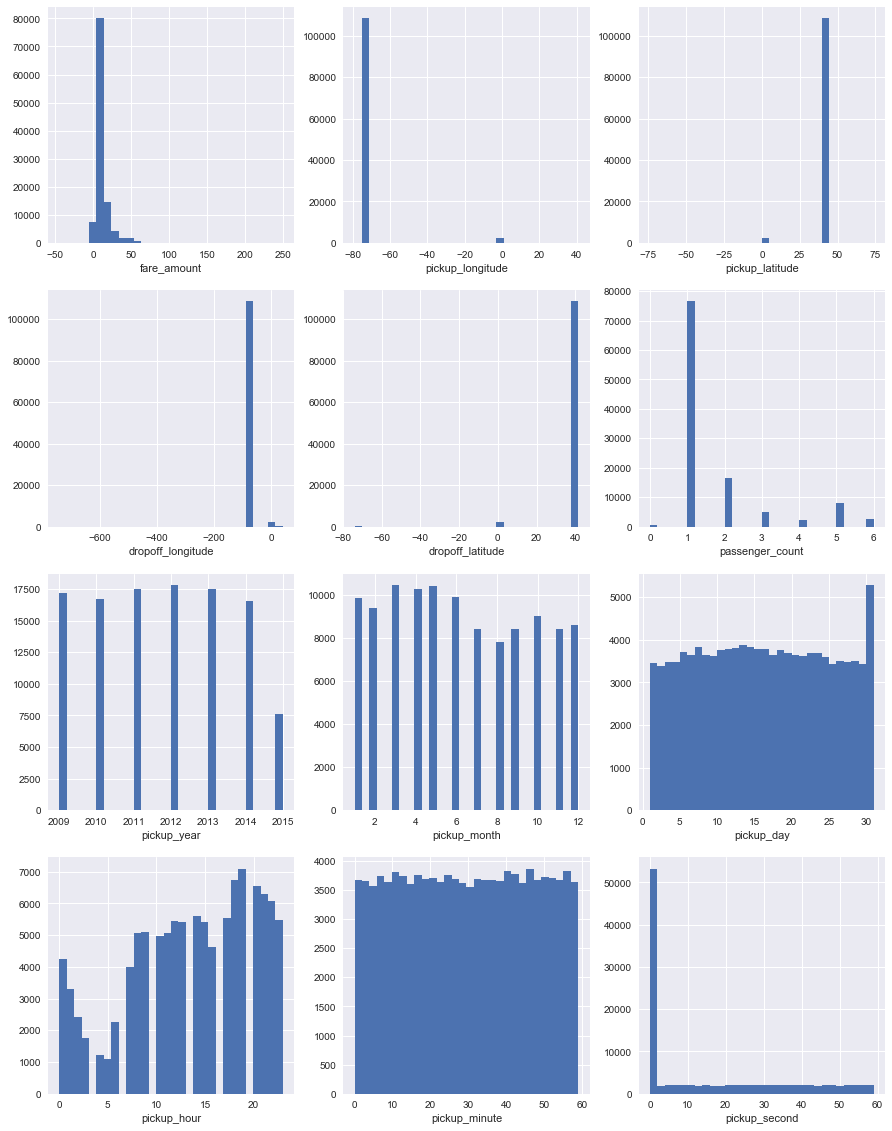

In [29]:
fig = plt.figure(figsize=(15,20))
column_list = df.columns.tolist()

for i in range(12):
    ax = fig.add_subplot(4,3,i+1)
    df[column_list[i]].hist(ax=ax, bins=30)
    ax.set_xlabel(column_list[i])

There are some strong discrepencies in distribution of longitudes, latitudes and pickup_second.  
passenger_count is 0 for some rides.  
First examine pickup_second.

In [11]:
(df['pickup_second']==0).sum()/df.shape[0]

0.47235455464125886

Many values seem to be rounded off. Therefore not correct information. Drop it.

In [12]:
#df.drop(columns=['pickup_second'], inplace=True)

In [13]:
(df['passenger_count']==0).sum()

401

In [14]:
df[df['passenger_count']==0]['fare_amount'].mean()

9.040972568578566

In [15]:
(df['fare_amount']==0).sum()

3

In [37]:
df[df['fare_amount']==0]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute
223,0.0,-73.484480,40.813401,-73.484442,40.813323,2,2014,6,29,16,4
26267,0.0,-74.034782,40.729427,-74.035797,40.725018,3,2015,2,8,14,42
102336,0.0,-73.936088,40.708797,-73.936088,40.708797,2,2013,8,30,3,35


In [31]:
df[abs(df['pickup_longitude'] - df['dropoff_longitude'])>70]['fare_amount'].max()

250.0

USA Latitude range (appr.) : (-65) - (-125)  
USA Longitude range (appr.) : 25 - 50

In [35]:
(~df['pickup_longitude'].between(-80, -60)).sum()

2221

In [36]:
(df['pickup_longitude']==0).sum()

2147

In [37]:
(df['pickup_latitude']==0).sum()

2136

In [38]:
df[df['dropoff_longitude']<-100]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute
70834,5.7,-73.990828,40.750652,-742.25,40.735002,2,2010,12,17,11,16


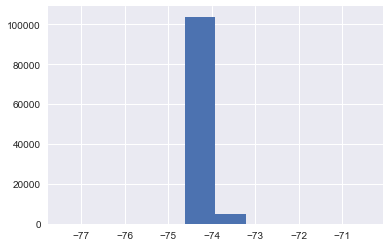

In [39]:
df[df['dropoff_longitude'].between(-200,-50)]['dropoff_longitude'].hist()

In [9]:
df = df[(df['pickup_longitude'].between(-80,-65)) & (df['dropoff_longitude'].between(-80,-65)) & (df['pickup_latitude'].between(35,50)) & (df['dropoff_latitude'].between(35,50))]

In [10]:
df = df[df['passenger_count'].between(1,10)]

In [49]:
df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_year', 'pickup_month', 'pickup_day', 'pickup_hour',
       'pickup_minute'],
      dtype='object')

In [54]:
(df['fare_amount']<2.5).sum()

10

2.5 is the minimum fare. values less than this are most probably invalid entries. drop them.

In [11]:
df = df[df['fare_amount'] >= 2.5]

### Notes
Don't create pickup_second.  
Drop rows with longitude outside (-80,-65).  
Drop rows with latitude outside (35,50).  
Drop rows with passenger_count < 1 and > 10  
Drop rows with fare_amount < 2.5

In [12]:
df.shape

(108108, 10)

### Bivariate

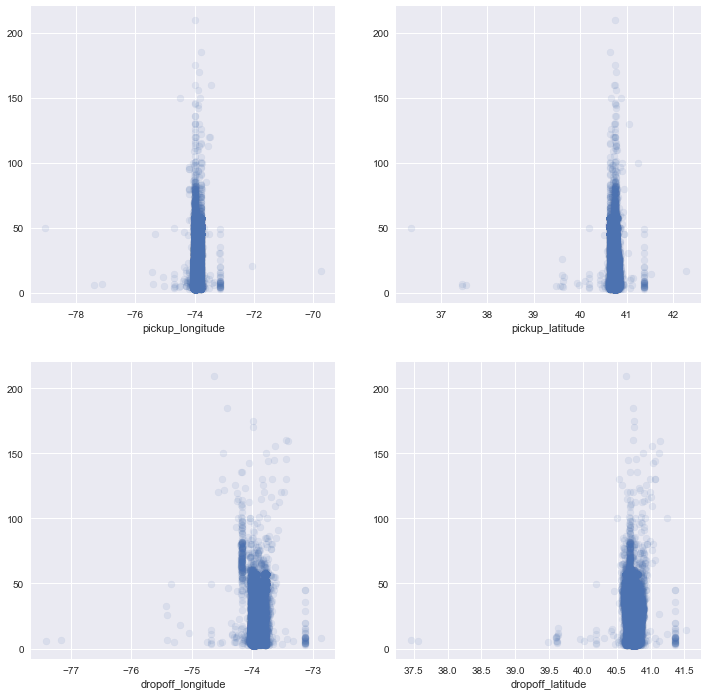

In [63]:
fig = plt.figure(figsize=(12,12))
temp_list = df.columns.tolist()[1:5]

for i in range(4):
    ax = fig.add_subplot(2,2,i+1)
    plt.scatter(df[temp_list[i]], df['fare_amount'], alpha=0.1)
    ax.set_xlabel(temp_list[i])

Individually these latitude and longitude features seems to be of no use. Use them to create new features like distance, direction, etc and drop them later.

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


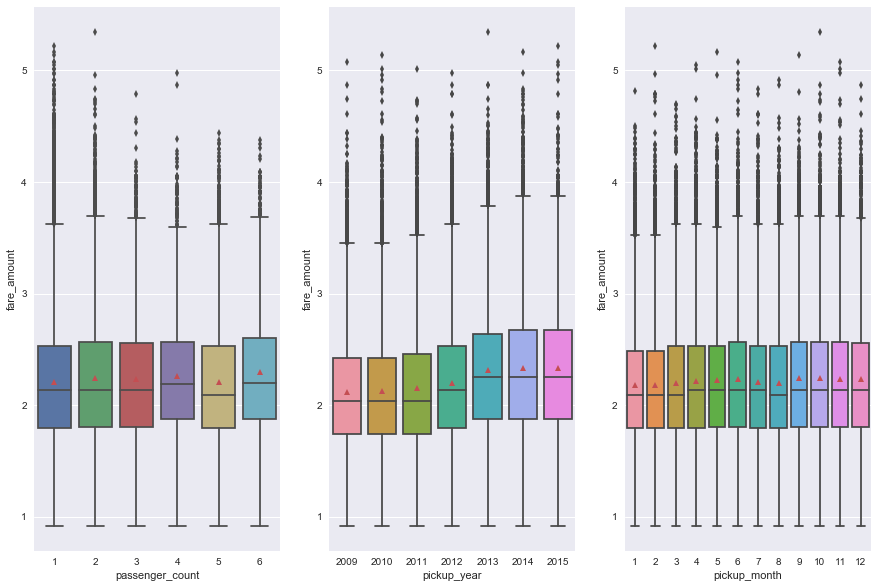

In [66]:
fig = plt.figure(figsize=(15,10))
temp_list = df.columns.tolist()[5:8]

for i in range(3):
    ax = fig.add_subplot(1,3,i+1)
    sns.boxplot(df[temp_list[i]], df['fare_amount'].apply(np.log), showmeans=True)
    ax.set_xlabel(temp_list[i])

In [69]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [73]:
def anova_result(feat, target, df):
    df_lm = ols(target + ' ~ ' + feat, data=df).fit()
    result = sm.stats.anova_lm(df_lm, typ=2) # return result in dataframe
    print("{}:\n{}".format(feat, result))

In [74]:
for feat in temp_list:
    anova_result(feat, 'fare_amount', df)

passenger_count:
                       sum_sq        df          F    PR(>F)
passenger_count  1.550195e+03       1.0  16.413166  0.000051
Residual         1.021042e+07  108106.0        NaN       NaN
pickup_year:
                   sum_sq        df            F         PR(>F)
pickup_year  1.305054e+05       1.0  1399.441306  2.493000e-304
Residual     1.008147e+07  108106.0          NaN            NaN
pickup_month:
                    sum_sq        df          F        PR(>F)
pickup_month  5.761657e+03       1.0  61.028511  5.675654e-15
Residual      1.020621e+07  108106.0        NaN           NaN


All 3 features seem helpful.

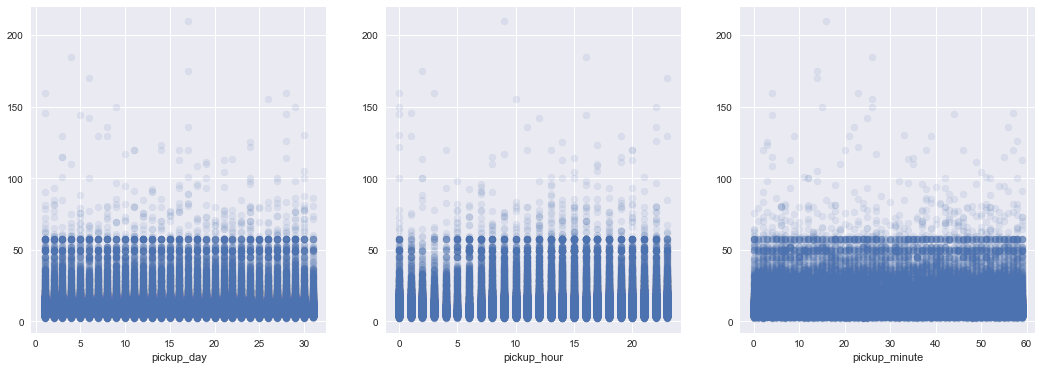

In [75]:
fig = plt.figure(figsize=(18,6))
temp_list = df.columns.tolist()[8:11]

for i in range(3):
    ax = fig.add_subplot(1,3,i+1)
    plt.scatter(df[temp_list[i]], df['fare_amount'], alpha=0.1)
    ax.set_xlabel(temp_list[i])

In [76]:
for feat in temp_list:
    anova_result(feat, 'fare_amount', df)

pickup_day:
                  sum_sq        df         F    PR(>F)
pickup_day  6.299502e+02       1.0  6.669192  0.009811
Residual    1.021134e+07  108106.0       NaN       NaN
pickup_hour:
                   sum_sq        df          F        PR(>F)
pickup_hour  4.779271e+03       1.0  50.618024  1.129026e-12
Residual     1.020719e+07  108106.0        NaN           NaN
pickup_minute:
                     sum_sq        df         F    PR(>F)
pickup_minute  1.431114e+02       1.0  1.515028  0.218376
Residual       1.021183e+07  108106.0       NaN       NaN


/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


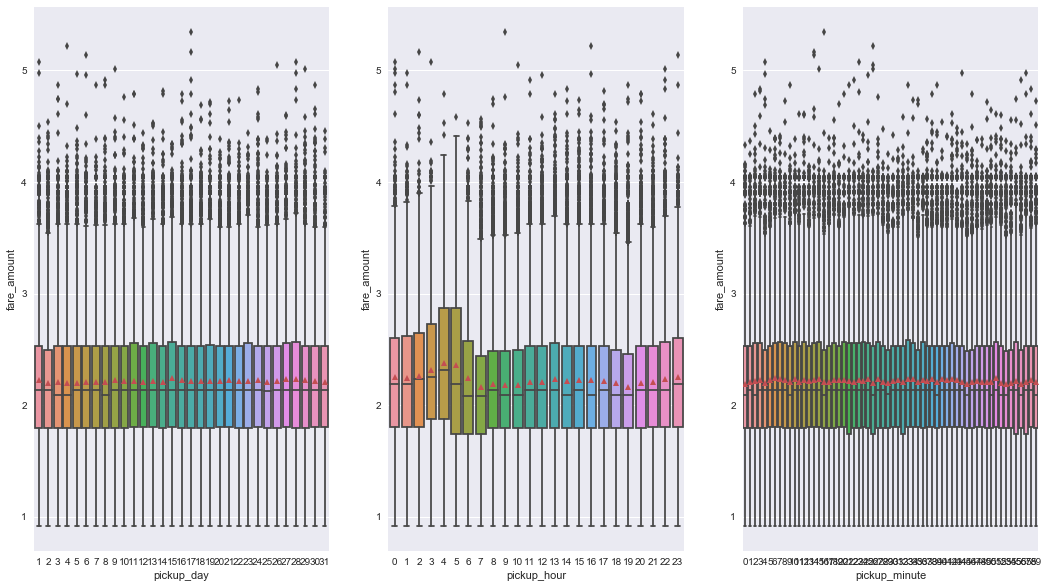

In [78]:
fig = plt.figure(figsize=(18,10))
temp_list = df.columns.tolist()[8:11]

for i in range(3):
    ax = fig.add_subplot(1,3,i+1)
    sns.boxplot(df[temp_list[i]], df['fare_amount'].apply(np.log), showmeans=True)
    ax.set_xlabel(temp_list[i])

#### Notes
Don't create pickup_day.  
Create new feature 'pickup_fhour' from pickup_hour and pickup_minute. Then drop pickup_minute.  

In [80]:
#df.drop(columns=['pickup_day','pickup_minute'], inplace=True)

### More New Features

In [14]:
df['pickup_fhour'] = df['pickup_hour'] + round(df['pickup_minute']/60, 2)

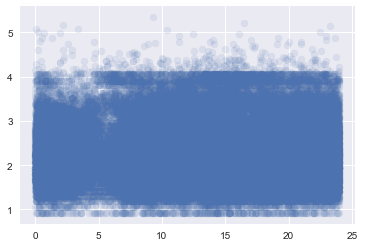

In [16]:
plt.scatter(df['pickup_fhour'], df['fare_amount'].apply(np.log), alpha=0.1)

doesn't seem useful, drop it. Also don't create pickup_minute.

In [17]:
df.drop(columns=['pickup_fhour'], inplace=True)